# T.P. : Cycles et chemins dans un graphe

## Objectif
Nous allons utiliser les algorithmes de parcours de graphe pour déterminer les cycles et les chemins dans un graphe.

## Parcours d'un graphe à la main
On considère le graphe <code>G</code> suivant

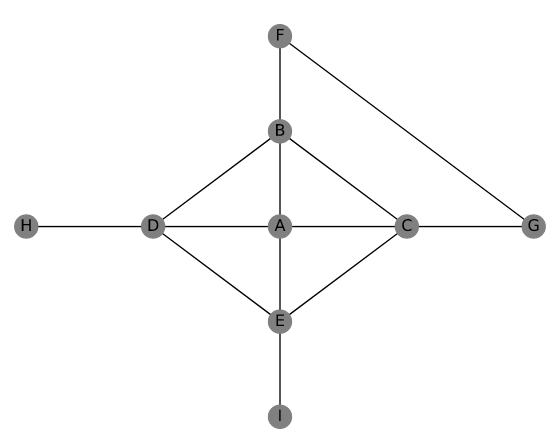

### Question 1
    
On choisit de partir de A.
    
Réaliser à la main un parcours en largeur du graphe (on insérera dans la file les sommets pas ordre alphabétique), en indiquant les états successifs de la file. Donner à la fin la liste des sommets parcourus.

### Question 2
    
Même question en partant de H.

### Question 3
    
Même question pour le parcours en profondeur (donc avec une pile) en partant de A.

### Question 4
    
Même question en partant de H.

## Implémentation des parcours
On donne ci-dessous les classes <code>File</code>, <code>Pile</code> et <code>Graphe</code> dont on utilisera les méthodes. La classe Graphe représente un graphe par un dictionnaire d'adjacence (similaire à la liste d'adjacence vue en cours).

Exécuter les deux cellules suivantes.

In [ ]:
# Import de graphviz pour l'affichage des graphes.
from graphviz import Graph
import basthon

In [ ]:
class File:
    '''Une implémentation basique à l'aide d'une liste python'''
    def __init__(self):
        self.liste=[]
    def estVide(self):
        return self.liste==[]
    def enfile(self,e):
        self.liste.append(e)
    def defile(self):
        return self.liste.pop(0)
class Pile:
    '''Une implémentation basique à l'aide d'une liste python'''
    def __init__(self):
        self.liste=[]
    def estVide(self):
        return self.liste==[]
    def empile(self,e):
        self.liste.append(e)
    def depile(self):
        return self.liste.pop()
class Graphe:    
    def __init__(self):
        self.d = dict() # dictionnaire d'adjacence 
    def ajoute_sommet(self,s):
        '''Ajoute le sommet s au graphe si celui-ci est un nouveau sommet''' 
        if s not in self.d :
            self.d[s] = []
    def ajoute_arete(self,s,t):
        '''Ajoute si nécessaire les sommets s et t puis crée si elle n'existait pas une arête entre s et t'''
        self.ajoute_sommet(s)
        self.ajoute_sommet(t)
        if t not in self.d[s]:
            self.d[s].append(t)
        if s not in self.d[t]:
            self.d[t].append(s)
    def arete(self,s,t):
        '''Renvoie True s'il y a une arête entre s et t et False sinon'''
        return (t in self.d[s])
    def sommets(self):
        '''Renvoie la liste de tous les sommets du graphe'''
        return list(self.d.keys())
    def voisins(self,s):
        '''Renvoie la liste des voisins de s'''
        return self.d[s]
    def affiche(self): 
        "Affichage du graphe en utilisant le module networkx"
        dot = Graph('G')
        for s in self.sommets():
            for t in self.voisins(s): 
                # Condition pour éviter les doubles arêtes
                if '{} -- {}'.format(t,s) not in dot.source:
                    dot.edge(s,t)
        basthon.display(dot)

### Question 5
    
Compléter le code ci-dessous pour instancier et représenter le graphe G plus haut. La liste L est la liste des arêtes du graphe : elle est donnée pour vous aider à instancier le graphe.

In [ ]:
L=[('A','B'),('A','C'),('A','D'),('A','E'),('B','C'),('B','D'),('B','F'),('C','E'),('C','G'),('D','E'),('D','H'),('E','I'),('F','G')]
G=Graphe()
# à compléter

### Question 6
    
Compléter la fonction ``parcoursLargeur`` ci-dessous et la tester. Vous pouvez vous aider du cours, mais il faut adapter le code aux implémentations des graphes et des files définies ci-dessus.

In [ ]:
def parcoursLargeur(G,s):
    """Parcours en largeur d'abord d'un graphe
    Args:
        G: une instance de l'objet Graphe
        s: le sommet de départ
    Returns:
        L: Une liste contenant les nœuds visités dans l'ordre du parcours.
    """
    F=File()
    L=[] # la liste des sommets visités que l'on va retourner
    marque={s:False for s in G.sommets()}
    pass

In [ ]:
# tests (on vérifiera les réponses aux questions 1 et 2)


In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert parcoursLargeur(GTest,0)==[0, 1, 3, 5, 7, 9, 2, 4, 6, 8]
assert parcoursLargeur(GTest,1)==[1, 0, 2, 4, 6, 8, 3, 5, 7, 9]
print("Tests réussis !")

### Question 7
    
Compléter la fonction ``parcoursProfondeur`` ci-dessous et la tester. Vous pouvez vous aider du cours, mais il faut adapter le code aux implémentations des graphes et des piles définies ci-dessus.

In [ ]:
def parcoursProfondeur(G,s):
    """Parcours en profondeur d'abord d'un graphe
    Args:
        G: une instance de l'objet Graphe
        s: le sommet de départ
    Returns:
        L: Une liste contenant les nœuds visités dans l'ordre du parcours.
    """
    pass

In [ ]:
# jeu de tests (on vérifiera les réponses aux questions 1 et 2)


In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert parcoursProfondeur(GTest,0)==[0, 9, 8, 6, 4, 2, 7, 5, 3, 1]
assert parcoursProfondeur(GTest,1)==[1, 8, 9, 7, 5, 3, 6, 4, 2, 0]
print("Tests réussis !")

## 1ère application : détecter si un graphe est connexe ou pas

### Question 8

Un graphe est dit **connexe** s'il existe un chemin entre chaque paire de sommets. Autrement dit, un graphe est connexe si un parcours en largeur ou en profondeur du graphe permet de visiter tous les sommets.
    
Compléter la fonction suivante qui teste si un graphe est connexe ou pas, puis la tester.

In [ ]:
def estConnexe(G):
    ''' Teste si un graphe est connexe
    Args:
        un graphe G non vide
    Returns:
        True si G est connexe, False sinon
    '''
    pass

In [ ]:
# Jeu de tests de la fonction estConnexe


In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
GTestBis=Graphe()
for i in range(9):
    for j in range(i+1,10):
        GTestBis.ajoute_arete(i,j)
for i in range(10,19):
    for j in range(i+1,20):
        GTestBis.ajoute_arete(i,j) 
assert estConnexe(GTest)==True
assert estConnexe(GTestBis)==False

## Application du parcours en largeur : calculer la distance entre 2 sommets
On rappelle que la distance entre deux sommets s et t d'un graphe non orienté est la longueur de la plus petite chaîne reliant  s et t

### Question 9
    
Compléter la fonction suivante qui renvoie le dictionnaire donnant les distances entre un sommet ``s`` donné et tous les autres sommets du graphe atteignables par ``s``

In [ ]:
def distances(G,s):
    ''' 
    Calcule les distances entre s et les autres sommets
    Args:
        un graphe G non orienté et un sommet s
    Returns:
        le dictionnaire donnant la distance entre s et les autres sommets atteignables par s
    '''
    F=File()
    d=dict() # le dictionnaire en question
    F.enfile(s)
    d[s]=0 # la distance de s à s est 0, cela permet également de marquer s
    pass

In [ ]:
# Jeu de tests de la fonction distances


In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,10,2):
    for j in range(1,10,2):
        GTest.ajoute_arete(i,j)
assert distances(GTest,0)=={0: 0, 1: 1, 3: 1, 5: 1, 7: 1, 9: 1, 2: 2, 4: 2, 6: 2, 8: 2}
assert distances(GTest,1)=={1: 0, 0: 1, 2: 1, 4: 1, 6: 1, 8: 1, 3: 2, 5: 2, 7: 2, 9: 2}

## Application du parcours en profondeur : détecter un cycle

### Question 10
    
À l'image de l'instanciation du graphe G fait plus haut, créer un graphe G2 acyclique (càd sans cycle), par exemple un arbre et le dessiner

In [ ]:
G2=Graphe()
# à compléter

### Question 11

On donne ci-dessous l'algorithme de détection de cycle dans un graphe non orienté dont les sommets sont les entiers de $0$ à $n-1$.

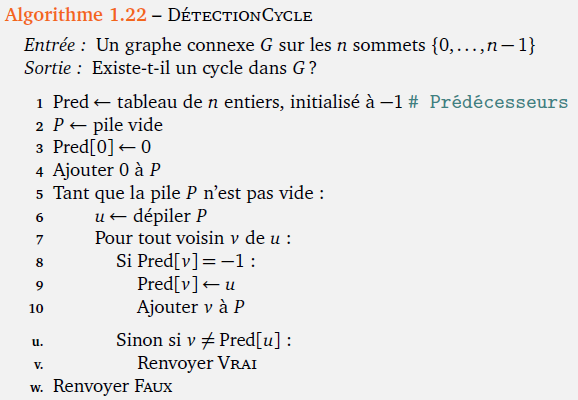    

Adapter cet algorithme (pour qu'il puisse fonctionner avec des sommets autres que des entiers de 0 à n) en prenant non pas une liste de prédécesseurs, mais un dictionnaire, puis compléter la fonction suivante qui détecte s'il y a un cycle ou non, et enfin la tester.

In [ ]:
def detectionCycle(G,s):
    ''' In : un graphe G non orienté et un sommet s
        Out: True s'il n'y a pas de cycle atteignable par s, et False sinon'''
    P=Pile()
    Pred=dict() # le dictionnaire des prédécesseurs (inutile d'initialiser à -1 puisqu'il est vide)
    P.empile(s)
    Pred[s]=s
    pass

In [ ]:
# Jeu de tests de la fonction detectionCycle


In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,20,2):
    GTest.ajoute_arete(i,i+1)
    GTest.ajoute_arete(i+1,i+2)
assert detectionCycle(GTest,0)==False
GTest.ajoute_arete(0,19)
assert detectionCycle(GTest,0)==True

### Question 12

Compléter la fonction suivante qui teste si le graphe donné est un arbre ou pas.

Challenge : à faire sur 1 seule ligne (si c'est possible en utilisant les fonctions précédentes et sans compter la docstring évidemment)

In [ ]:
def estUnArbre(G):
    ''' 
    Teste si un graphe est un arbre
    Args:
        un graphe G non orienté
    Returns:
        True si G est un arbre et False sinon
    '''
    pass

In [ ]:
# Jeu de tests de la fonction estUnArbre


In [ ]:
# Test des différentes méthodes précédentes
# me permet de voir que vos méthodes ont l'air correctes, c'est le cas si cette cellule ne renvoie pas d'erreur
GTest=Graphe()
for i in range(0,20,2):
    GTest.ajoute_arete(i,i+1)
    GTest.ajoute_arete(i+1,i+2)
assert estUnArbre(GTest)==True
GTest.ajoute_arete(0,19)
assert estUnArbre(GTest)==False
GTestBis=Graphe()
for i in range(9):
    for j in range(i+1,10):
        GTestBis.ajoute_arete(i,j)
for i in range(10,19):
    for j in range(i+1,20):
        GTestBis.ajoute_arete(i,j) 
assert estUnArbre(GTestBis)==False